In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
csv_in = 'covid-19-pref-area-20200403.csv'
df = pd.read_csv(csv_in, delimiter=',', skiprows=7, header=0)
print(df.shape)
print(df.info())
display(df.head())

(47, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pref        47 non-null     object 
 1   Pop(100k)   47 non-null     float64
 2   Infected    47 non-null     int64  
 3   Discharged  47 non-null     int64  
 4   PCR         47 non-null     int64  
 5   Area        47 non-null     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 2.3+ KB
None


,Pref,Pop(100k),Infected,Discharged,PCR,Area
0,Hokkaido,53.2,190,130,2803,Hokkaido
1,Aomori,12.8,11,0,249,Tohoku
2,Iwate,12.6,0,0,69,Tohoku
3,Miyagi,23.2,13,1,479,Tohoku
4,Akita,10.0,9,2,358,Tohoku


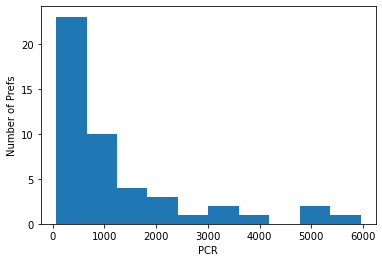

In [5]:
plt.hist(df['PCR'])
plt.xlabel('PCR')
plt.ylabel('Number of Prefs')
plt.show()

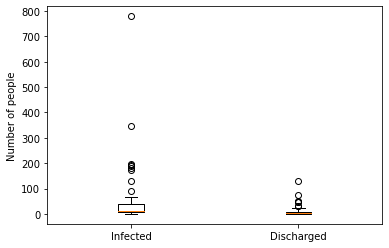

In [6]:
df_bp = df[['Infected', 'Discharged']]
plt.boxplot(df_bp.values)
plt.xticks([1,2], df_bp.columns)
plt.ylabel('Number of people')
plt.show()

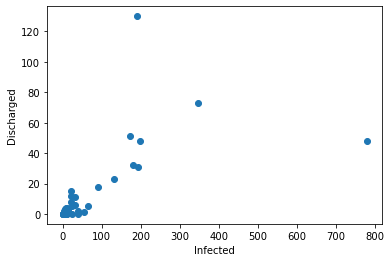

In [7]:
plt.scatter(df['Infected'], df['Discharged'])
plt.xlabel('Infected')
plt.ylabel('Discharged')
plt.show()

,Pop(100k),Infected,Discharged,PCR
Area,,,,
Chubu,205.5,359,73,8441
Chugoku,73.7,24,4,2690
Hokkaido,53.2,190,130,2803
Kanto,440.7,1384,140,20122
Kinki,224.2,678,172,13730
Kyushu,143.5,140,20,7443
Shikoku,37.8,37,16,1543
Tohoku,88.4,43,4,2070


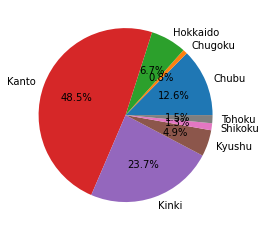

In [8]:
df_area = df.groupby('Area').sum()
display(df_area)
plt.pie(df_area['Infected'], autopct="%.1f%%", labels=df_area.index)
plt.show()

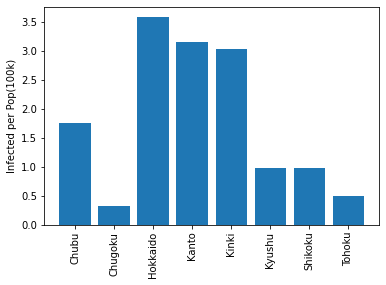

In [9]:
df_area['Infected_rate'] = df_area['Infected'] / df_area['Pop(100k)']
plt.bar(df_area.index, df_area['Infected_rate'])
plt.xticks(rotation=90)
plt.ylabel('Infected per Pop(100k)')
plt.show()

In [11]:
csv_in2 = 'covid-19-japan-20200407.csv'
df_jpn = pd.read_csv(csv_in2, delimiter=',', skiprows=0, header=0)
print(df_jpn.shape)
print(df_jpn.info())
display(df_jpn.head())

(57, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          57 non-null     object
 1   Infected_day  57 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ KB
None


,Date,Infected_day
0,2020-02-06,16
1,2020-02-07,0
2,2020-02-10,0
3,2020-02-12,0
4,2020-02-13,1


In [12]:
df_jpn['Date'] = pd.to_datetime(df_jpn['Date'])
print(df_jpn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          57 non-null     datetime64[ns]
 1   Infected_day  57 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.0 KB
None


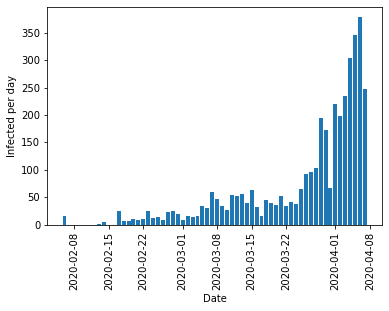

In [13]:
plt.bar(df_jpn['Date'], df_jpn['Infected_day'])
plt.xlabel('Date')
plt.ylabel('Infected per day')
plt.xticks(rotation=90)
plt.show()

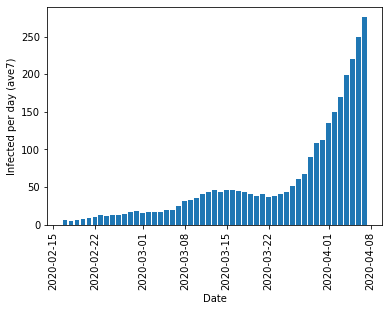

In [14]:
plt.bar(df_jpn['Date'],
        df_jpn['Infected_day'].rolling(window=7).mean())
plt.xlabel('Date')
plt.ylabel('Infected per day (ave7)')
plt.xticks(rotation=90)
plt.show()

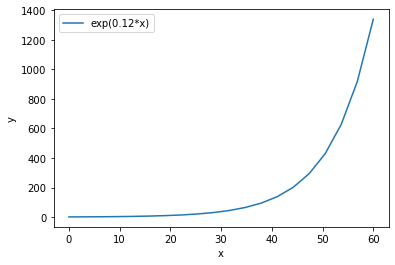

In [15]:
a = 0.12
x = np.linspace(0, 60, num=20)
y = np.exp(a*x)
label1 = 'exp({:.2f}*x)'.format(a)
plt.plot(x, y, label=label1)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()